In [2]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import os
import cv2 
from matplotlib import pyplot as plt
import torch.utils.data as data
import numpy as np
from helpers.gan import Generator, Discriminator
from helpers.dataset import IconsDataset, basic_img_transform as img_transform
from helpers.visualization import visualize_images


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [14]:
root_dir = 'icons/png32/images/'
BATCH_SIZE = 64
bs = BATCH_SIZE
num_epochs = 500

In [16]:
dataset = IconsDataset(root_dir, transform=img_transform, imread_mode=cv2.IMREAD_GRAYSCALE)

In [17]:
loader = data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [18]:
test_batch = next(iter(loader))
convert = lambda x:np.reshape(x, (32, 32))
test_batch.size()

torch.Size([64, 1, 32, 32])

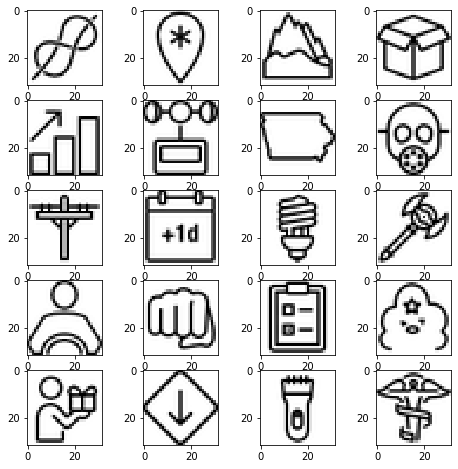

In [19]:
var = Variable(test_batch).cuda()
test_batch = test_batch.view(-1, 1, 32, 32)
visualize_images(test_batch, function=convert, cmap='gray')

In [20]:
def D_train(x):
    #=======================Train the discriminator=======================#
    D.zero_grad()

    # train discriminator on real
    x_real = x.view(-1, 1024)
    y_real = torch.ones(x_real.shape[0], 1)
    x_real, y_real = Variable(x_real.to(device)), Variable(y_real.to(device))

    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_score = D_output

    # train discriminator on facke
    z = Variable(torch.randn(bs, z_dim).to(device))
    x_fake, y_fake = G(z), Variable(torch.zeros(bs, 1).to(device))

    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_score = D_output

    # gradient backprop & optimize ONLY D's parameters
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()

def G_train(x):
    #=======================Train the generator=======================#
    G.zero_grad()

    z = Variable(torch.randn(bs, 200).to(device))
    y = Variable(torch.ones(bs, 1).to(device))
    
    G_output = G(z)
    D_output = D(G_output)
    G_loss = criterion(D_output, y)

    # gradient backprop & optimize ONLY G's parameters
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()

In [21]:
def generate_images(num_images):
    z = Variable(torch.randn(num_images, z_dim).to(device))
    images = G(z)
    images = images.reshape(-1, 32, 32)
    return images


  0%|          | 0/500 [00:00<?, ?it/s]

[0/500]: loss_d: 0.830157, loss_g: 1.643000


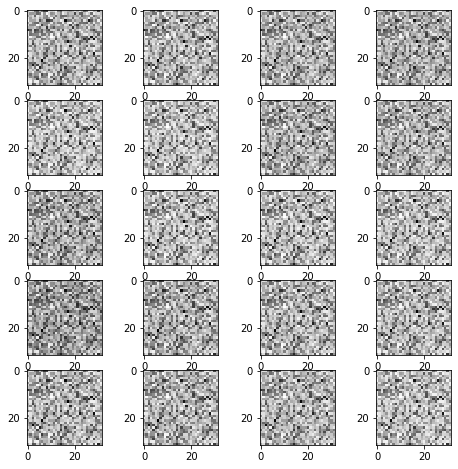


  0%|          | 2/500 [00:07<35:03,  4.22s/it]

[1/500]: loss_d: 1.149304, loss_g: 2.426085



  1%|          | 3/500 [00:09<30:37,  3.70s/it]

[2/500]: loss_d: 0.991065, loss_g: 2.781162



  1%|          | 4/500 [00:12<26:56,  3.26s/it]

[3/500]: loss_d: 0.997236, loss_g: 2.846815



  1%|          | 5/500 [00:14<24:27,  2.97s/it]

[4/500]: loss_d: 0.884650, loss_g: 3.302131



  1%|          | 6/500 [00:16<22:48,  2.77s/it]

[5/500]: loss_d: 0.868689, loss_g: 3.180705



  1%|▏         | 7/500 [00:19<21:42,  2.64s/it]

[6/500]: loss_d: 0.860579, loss_g: 3.384801



  2%|▏         | 8/500 [00:21<20:55,  2.55s/it]

[7/500]: loss_d: 0.870765, loss_g: 3.176740



  2%|▏         | 9/500 [00:23<20:17,  2.48s/it]

[8/500]: loss_d: 0.840546, loss_g: 3.173557



  2%|▏         | 10/500 [00:26<19:51,  2.43s/it]

[9/500]: loss_d: 0.875038, loss_g: 3.016850



  2%|▏         | 11/500 [00:28<19:35,  2.40s/it]

[10/500]: loss_d: 0.860122, loss_g: 2.959519



  2%|▏         | 12/500 [00:30<19:19,  2.38s/it]

[11/500]: loss_d: 0.883021, loss_g: 2.847966



  3%|▎         | 13/500 [00:33<19:09,  2.36s/it]

[12/500]: loss_d: 0.895172, loss_g: 2.743049



  3%|▎         | 14/500 [00:35<20:08,  2.49s/it]

[13/500]: loss_d: 0.909484, loss_g: 2.636049



  3%|▎         | 15/500 [00:39<21:58,  2.72s/it]

[14/500]: loss_d: 0.926082, loss_g: 2.536983



  3%|▎         | 16/500 [00:41<20:51,  2.59s/it]

[15/500]: loss_d: 0.940703, loss_g: 2.457308



  3%|▎         | 17/500 [00:43<20:16,  2.52s/it]

[16/500]: loss_d: 0.954852, loss_g: 2.375219



  4%|▎         | 18/500 [00:46<19:52,  2.47s/it]

[17/500]: loss_d: 0.968719, loss_g: 2.303467



  4%|▍         | 19/500 [00:48<19:26,  2.42s/it]

[18/500]: loss_d: 0.972446, loss_g: 2.250751



  4%|▍         | 20/500 [00:50<19:05,  2.39s/it]

[19/500]: loss_d: 0.972581, loss_g: 2.213376
[20/500]: loss_d: 0.968738, loss_g: 2.201922


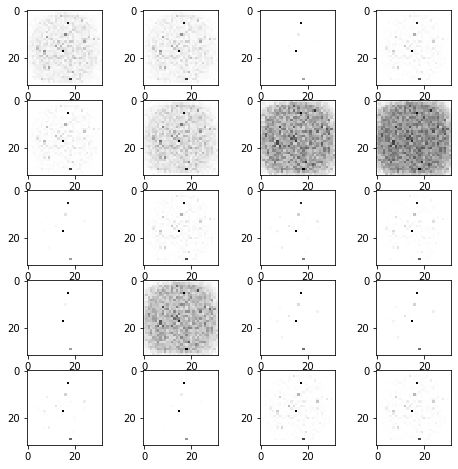


  4%|▍         | 22/500 [00:58<24:11,  3.04s/it]

[21/500]: loss_d: 0.962388, loss_g: 2.188909



  5%|▍         | 23/500 [01:00<22:37,  2.85s/it]

[22/500]: loss_d: 0.964278, loss_g: 2.159359



  5%|▍         | 24/500 [01:03<21:22,  2.69s/it]

[23/500]: loss_d: 0.967453, loss_g: 2.133004



  5%|▌         | 25/500 [01:05<20:20,  2.57s/it]

[24/500]: loss_d: 0.969259, loss_g: 2.107162



  5%|▌         | 26/500 [01:07<19:52,  2.52s/it]

[25/500]: loss_d: 0.972356, loss_g: 2.082411



  5%|▌         | 27/500 [01:10<19:13,  2.44s/it]

[26/500]: loss_d: 0.972353, loss_g: 2.063232



  6%|▌         | 28/500 [01:12<18:56,  2.41s/it]

[27/500]: loss_d: 0.969797, loss_g: 2.053988



  6%|▌         | 29/500 [01:14<18:36,  2.37s/it]

[28/500]: loss_d: 0.964629, loss_g: 2.041490



  6%|▌         | 30/500 [01:16<18:19,  2.34s/it]

[29/500]: loss_d: 0.962090, loss_g: 2.030930



  6%|▌         | 31/500 [01:19<18:11,  2.33s/it]

[30/500]: loss_d: 0.957896, loss_g: 2.035406



  6%|▋         | 32/500 [01:21<18:01,  2.31s/it]

[31/500]: loss_d: 0.955063, loss_g: 2.030355



  7%|▋         | 33/500 [01:23<18:04,  2.32s/it]

[32/500]: loss_d: 0.954610, loss_g: 2.017294



  7%|▋         | 34/500 [01:27<20:02,  2.58s/it]

[33/500]: loss_d: 0.955766, loss_g: 2.009867



  7%|▋         | 35/500 [01:29<19:13,  2.48s/it]

[34/500]: loss_d: 0.953905, loss_g: 1.994194



  7%|▋         | 36/500 [01:31<18:42,  2.42s/it]

[35/500]: loss_d: 0.952434, loss_g: 1.989237



  7%|▋         | 37/500 [01:33<18:24,  2.39s/it]

[36/500]: loss_d: 0.950421, loss_g: 1.986889



  8%|▊         | 38/500 [01:36<18:14,  2.37s/it]

[37/500]: loss_d: 0.949228, loss_g: 1.980508



  8%|▊         | 39/500 [01:38<18:04,  2.35s/it]

[38/500]: loss_d: 0.954405, loss_g: 1.963955



  8%|▊         | 40/500 [01:40<17:52,  2.33s/it]

[39/500]: loss_d: 0.955346, loss_g: 1.951137
[40/500]: loss_d: 0.953804, loss_g: 1.947800


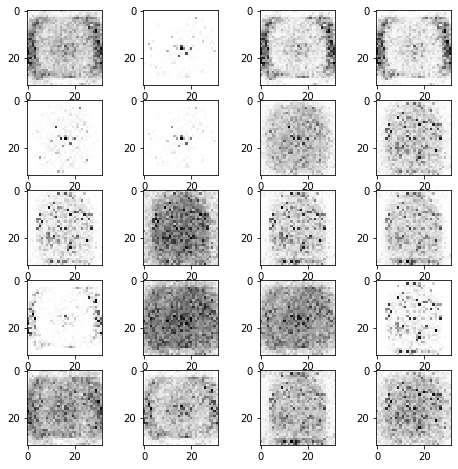


  8%|▊         | 42/500 [01:47<21:08,  2.77s/it]

[41/500]: loss_d: 0.953706, loss_g: 1.942551



  9%|▊         | 43/500 [01:49<20:30,  2.69s/it]

[42/500]: loss_d: 0.953501, loss_g: 1.934448



  9%|▉         | 44/500 [01:52<19:31,  2.57s/it]

[43/500]: loss_d: 0.952219, loss_g: 1.925332



  9%|▉         | 45/500 [01:54<19:13,  2.53s/it]

[44/500]: loss_d: 0.950458, loss_g: 1.922322



  9%|▉         | 46/500 [01:57<18:55,  2.50s/it]

[45/500]: loss_d: 0.951015, loss_g: 1.916807



  9%|▉         | 47/500 [02:00<20:08,  2.67s/it]

[46/500]: loss_d: 0.953862, loss_g: 1.906482



 10%|▉         | 48/500 [02:03<20:35,  2.73s/it]

[47/500]: loss_d: 0.955047, loss_g: 1.893461



 10%|▉         | 49/500 [02:05<20:54,  2.78s/it]

[48/500]: loss_d: 0.958580, loss_g: 1.885983



 10%|█         | 50/500 [02:08<19:37,  2.62s/it]

[49/500]: loss_d: 0.961659, loss_g: 1.872014



 10%|█         | 51/500 [02:10<19:25,  2.60s/it]

[50/500]: loss_d: 0.961852, loss_g: 1.862416



 10%|█         | 52/500 [02:13<20:13,  2.71s/it]

[51/500]: loss_d: 0.967997, loss_g: 1.847807



 11%|█         | 53/500 [02:17<23:02,  3.09s/it]

[52/500]: loss_d: 0.969177, loss_g: 1.834834



 11%|█         | 54/500 [02:22<27:26,  3.69s/it]

[53/500]: loss_d: 0.971087, loss_g: 1.827242



 11%|█         | 55/500 [02:25<24:23,  3.29s/it]

[54/500]: loss_d: 0.971829, loss_g: 1.819122



 11%|█         | 56/500 [02:27<21:56,  2.97s/it]

[55/500]: loss_d: 0.969418, loss_g: 1.818217



 11%|█▏        | 57/500 [02:29<20:07,  2.72s/it]

[56/500]: loss_d: 0.969176, loss_g: 1.812102



 12%|█▏        | 58/500 [02:31<18:53,  2.56s/it]

[57/500]: loss_d: 0.970354, loss_g: 1.809803



 12%|█▏        | 59/500 [02:34<20:03,  2.73s/it]

[58/500]: loss_d: 0.971926, loss_g: 1.801699



 12%|█▏        | 60/500 [02:38<20:58,  2.86s/it]

[59/500]: loss_d: 0.972114, loss_g: 1.796030
[60/500]: loss_d: 0.973040, loss_g: 1.789595


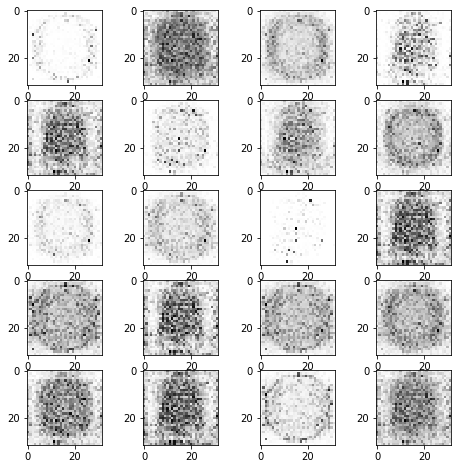


 12%|█▏        | 62/500 [02:44<22:08,  3.03s/it]

[61/500]: loss_d: 0.971822, loss_g: 1.786195



 13%|█▎        | 63/500 [02:47<20:58,  2.88s/it]

[62/500]: loss_d: 0.972143, loss_g: 1.783981



 13%|█▎        | 64/500 [02:49<19:30,  2.68s/it]

[63/500]: loss_d: 0.972783, loss_g: 1.781245



 13%|█▎        | 65/500 [02:52<19:43,  2.72s/it]

[64/500]: loss_d: 0.973110, loss_g: 1.773950



 13%|█▎        | 66/500 [02:56<21:45,  3.01s/it]

[65/500]: loss_d: 0.973448, loss_g: 1.771036



 13%|█▎        | 67/500 [02:59<22:43,  3.15s/it]

[66/500]: loss_d: 0.973275, loss_g: 1.767449



 14%|█▎        | 68/500 [03:02<23:13,  3.23s/it]

[67/500]: loss_d: 0.973768, loss_g: 1.765431



 14%|█▍        | 69/500 [03:05<21:22,  2.98s/it]

[68/500]: loss_d: 0.973857, loss_g: 1.760469



 14%|█▍        | 70/500 [03:07<20:04,  2.80s/it]

[69/500]: loss_d: 0.974186, loss_g: 1.754849



 14%|█▍        | 71/500 [03:10<19:07,  2.67s/it]

[70/500]: loss_d: 0.976285, loss_g: 1.748546



 14%|█▍        | 72/500 [03:12<19:21,  2.71s/it]

[71/500]: loss_d: 0.978293, loss_g: 1.741570



 15%|█▍        | 73/500 [03:15<19:34,  2.75s/it]

[72/500]: loss_d: 0.978906, loss_g: 1.736045



 15%|█▍        | 74/500 [03:18<18:34,  2.62s/it]

[73/500]: loss_d: 0.979830, loss_g: 1.731636



 15%|█▌        | 75/500 [03:20<19:05,  2.69s/it]

[74/500]: loss_d: 0.979534, loss_g: 1.727526



 15%|█▌        | 76/500 [03:23<18:13,  2.58s/it]

[75/500]: loss_d: 0.980613, loss_g: 1.721024



 15%|█▌        | 77/500 [03:25<17:32,  2.49s/it]

[76/500]: loss_d: 0.983215, loss_g: 1.713557



 16%|█▌        | 78/500 [03:27<17:11,  2.44s/it]

[77/500]: loss_d: 0.984168, loss_g: 1.707334



 16%|█▌        | 79/500 [03:30<16:50,  2.40s/it]

[78/500]: loss_d: 0.985710, loss_g: 1.702463



 16%|█▌        | 80/500 [03:32<16:32,  2.36s/it]

[79/500]: loss_d: 0.985886, loss_g: 1.697327
[80/500]: loss_d: 0.986766, loss_g: 1.693154


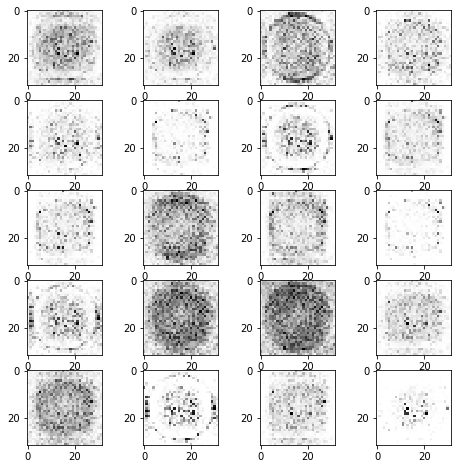


 16%|█▋        | 82/500 [03:39<19:41,  2.83s/it]

[81/500]: loss_d: 0.987853, loss_g: 1.687957



 17%|█▋        | 83/500 [03:42<19:42,  2.84s/it]

[82/500]: loss_d: 0.989412, loss_g: 1.681994



 17%|█▋        | 84/500 [03:44<19:17,  2.78s/it]

[83/500]: loss_d: 0.991219, loss_g: 1.676182



 17%|█▋        | 85/500 [03:47<18:13,  2.63s/it]

[84/500]: loss_d: 0.992692, loss_g: 1.671492



 17%|█▋        | 86/500 [03:49<17:21,  2.52s/it]

[85/500]: loss_d: 0.994029, loss_g: 1.666463



 17%|█▋        | 87/500 [03:51<16:45,  2.43s/it]

[86/500]: loss_d: 0.995831, loss_g: 1.660883



 18%|█▊        | 88/500 [03:53<16:27,  2.40s/it]

[87/500]: loss_d: 0.998037, loss_g: 1.656322



 18%|█▊        | 89/500 [03:57<17:54,  2.61s/it]

[88/500]: loss_d: 0.998015, loss_g: 1.654093



 18%|█▊        | 90/500 [03:59<17:31,  2.56s/it]

[89/500]: loss_d: 0.997533, loss_g: 1.651385



 18%|█▊        | 91/500 [04:01<17:13,  2.53s/it]

[90/500]: loss_d: 0.997999, loss_g: 1.649410



 18%|█▊        | 92/500 [04:04<16:32,  2.43s/it]

[91/500]: loss_d: 0.998801, loss_g: 1.646229



 19%|█▊        | 93/500 [04:06<16:37,  2.45s/it]

[92/500]: loss_d: 0.999784, loss_g: 1.642313



 19%|█▉        | 94/500 [04:08<16:24,  2.42s/it]

[93/500]: loss_d: 1.001210, loss_g: 1.638876



 19%|█▉        | 95/500 [04:11<15:47,  2.34s/it]

[94/500]: loss_d: 1.001777, loss_g: 1.638114



 19%|█▉        | 96/500 [04:13<15:43,  2.34s/it]

[95/500]: loss_d: 1.001907, loss_g: 1.636995



 19%|█▉        | 97/500 [04:15<15:35,  2.32s/it]

[96/500]: loss_d: 1.001787, loss_g: 1.636256



 20%|█▉        | 98/500 [04:18<15:36,  2.33s/it]

[97/500]: loss_d: 1.002344, loss_g: 1.634675



 20%|█▉        | 99/500 [04:20<15:31,  2.32s/it]

[98/500]: loss_d: 1.001265, loss_g: 1.633929



 20%|██        | 100/500 [04:22<15:27,  2.32s/it]

[99/500]: loss_d: 1.001141, loss_g: 1.631856
[100/500]: loss_d: 1.000944, loss_g: 1.630358


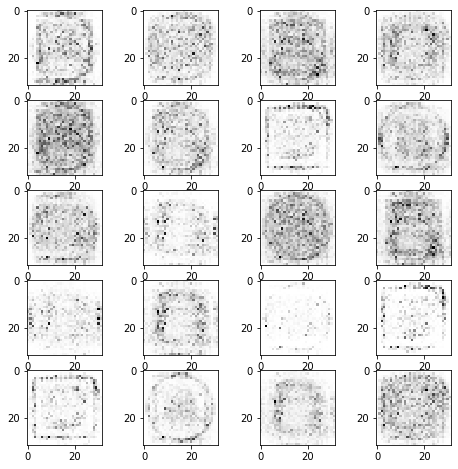


 20%|██        | 102/500 [04:29<19:04,  2.88s/it]

[101/500]: loss_d: 1.001921, loss_g: 1.627532



 21%|██        | 103/500 [04:32<17:40,  2.67s/it]

[102/500]: loss_d: 1.002094, loss_g: 1.625005



 21%|██        | 104/500 [04:34<16:59,  2.58s/it]

[103/500]: loss_d: 1.003250, loss_g: 1.622133



 21%|██        | 105/500 [04:36<16:11,  2.46s/it]

[104/500]: loss_d: 1.004462, loss_g: 1.619556



 21%|██        | 106/500 [04:39<15:58,  2.43s/it]

[105/500]: loss_d: 1.005505, loss_g: 1.616611



 21%|██▏       | 107/500 [04:42<17:07,  2.61s/it]

[106/500]: loss_d: 1.006991, loss_g: 1.612867



 22%|██▏       | 108/500 [04:44<16:11,  2.48s/it]

[107/500]: loss_d: 1.007079, loss_g: 1.612358



 22%|██▏       | 109/500 [04:46<15:32,  2.38s/it]

[108/500]: loss_d: 1.007155, loss_g: 1.611067



 22%|██▏       | 110/500 [04:48<15:05,  2.32s/it]

[109/500]: loss_d: 1.007694, loss_g: 1.611513



 22%|██▏       | 111/500 [04:50<14:43,  2.27s/it]

[110/500]: loss_d: 1.007494, loss_g: 1.611311



 22%|██▏       | 112/500 [04:53<14:55,  2.31s/it]

[111/500]: loss_d: 1.007002, loss_g: 1.610903



 23%|██▎       | 113/500 [04:55<15:00,  2.33s/it]

[112/500]: loss_d: 1.007750, loss_g: 1.610207



 23%|██▎       | 114/500 [04:58<15:27,  2.40s/it]

[113/500]: loss_d: 1.007215, loss_g: 1.609583



 23%|██▎       | 115/500 [05:00<15:12,  2.37s/it]

[114/500]: loss_d: 1.007622, loss_g: 1.606578



 23%|██▎       | 116/500 [05:02<15:08,  2.37s/it]

[115/500]: loss_d: 1.008219, loss_g: 1.603985



 23%|██▎       | 117/500 [05:05<14:57,  2.34s/it]

[116/500]: loss_d: 1.008270, loss_g: 1.602301



 24%|██▎       | 118/500 [05:07<15:09,  2.38s/it]

[117/500]: loss_d: 1.008968, loss_g: 1.600970



 24%|██▍       | 119/500 [05:09<15:03,  2.37s/it]

[118/500]: loss_d: 1.009858, loss_g: 1.598804



 24%|██▍       | 120/500 [05:12<14:59,  2.37s/it]

[119/500]: loss_d: 1.010198, loss_g: 1.597213
[120/500]: loss_d: 1.010212, loss_g: 1.596243


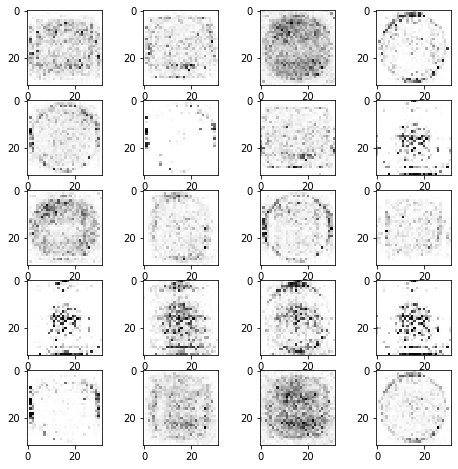


 24%|██▍       | 122/500 [05:19<17:39,  2.80s/it]

[121/500]: loss_d: 1.010868, loss_g: 1.593173



 25%|██▍       | 123/500 [05:21<17:29,  2.78s/it]

[122/500]: loss_d: 1.012322, loss_g: 1.589274



 25%|██▍       | 124/500 [05:24<17:07,  2.73s/it]

[123/500]: loss_d: 1.013605, loss_g: 1.584962



 25%|██▌       | 125/500 [05:26<16:02,  2.57s/it]

[124/500]: loss_d: 1.014700, loss_g: 1.583160



 25%|██▌       | 126/500 [05:28<15:16,  2.45s/it]

[125/500]: loss_d: 1.016131, loss_g: 1.580725



 25%|██▌       | 127/500 [05:31<15:24,  2.48s/it]

[126/500]: loss_d: 1.016616, loss_g: 1.579700



 26%|██▌       | 128/500 [05:34<16:22,  2.64s/it]

[127/500]: loss_d: 1.016767, loss_g: 1.579492



 26%|██▌       | 129/500 [05:36<15:44,  2.55s/it]

[128/500]: loss_d: 1.017173, loss_g: 1.577363



 26%|██▌       | 130/500 [05:38<15:10,  2.46s/it]

[129/500]: loss_d: 1.015939, loss_g: 1.579870



 26%|██▌       | 131/500 [05:41<15:03,  2.45s/it]

[130/500]: loss_d: 1.016419, loss_g: 1.579904



 26%|██▋       | 132/500 [05:44<15:51,  2.59s/it]

[131/500]: loss_d: 1.016940, loss_g: 1.577977



 27%|██▋       | 133/500 [05:46<15:02,  2.46s/it]

[132/500]: loss_d: 1.017484, loss_g: 1.577501



 27%|██▋       | 134/500 [05:48<14:43,  2.42s/it]

[133/500]: loss_d: 1.017709, loss_g: 1.576786



 27%|██▋       | 135/500 [05:51<14:45,  2.43s/it]

[134/500]: loss_d: 1.018423, loss_g: 1.573345



 27%|██▋       | 136/500 [05:53<15:16,  2.52s/it]

[135/500]: loss_d: 1.018593, loss_g: 1.571957



 27%|██▋       | 137/500 [05:56<14:52,  2.46s/it]

[136/500]: loss_d: 1.018920, loss_g: 1.570325



 28%|██▊       | 138/500 [05:58<14:31,  2.41s/it]

[137/500]: loss_d: 1.019146, loss_g: 1.569521



 28%|██▊       | 139/500 [06:00<14:24,  2.39s/it]

[138/500]: loss_d: 1.018600, loss_g: 1.568230



 28%|██▊       | 140/500 [06:03<14:47,  2.46s/it]

[139/500]: loss_d: 1.018968, loss_g: 1.567992
[140/500]: loss_d: 1.018929, loss_g: 1.566361


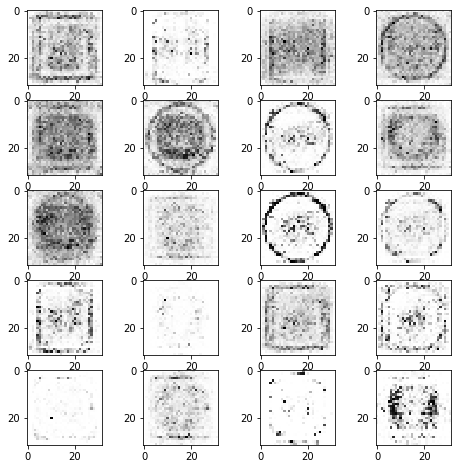


 28%|██▊       | 142/500 [06:11<18:42,  3.14s/it]

[141/500]: loss_d: 1.018650, loss_g: 1.565723



 29%|██▊       | 143/500 [06:13<17:02,  2.87s/it]

[142/500]: loss_d: 1.019166, loss_g: 1.564835



 29%|██▉       | 144/500 [06:16<16:13,  2.74s/it]

[143/500]: loss_d: 1.019251, loss_g: 1.562587



 29%|██▉       | 145/500 [06:18<15:10,  2.56s/it]

[144/500]: loss_d: 1.019898, loss_g: 1.560209



 29%|██▉       | 146/500 [06:20<14:26,  2.45s/it]

[145/500]: loss_d: 1.020803, loss_g: 1.556956



 29%|██▉       | 147/500 [06:22<14:17,  2.43s/it]

[146/500]: loss_d: 1.021188, loss_g: 1.554972



 30%|██▉       | 148/500 [06:25<13:48,  2.35s/it]

[147/500]: loss_d: 1.021770, loss_g: 1.552868



 30%|██▉       | 149/500 [06:27<13:47,  2.36s/it]

[148/500]: loss_d: 1.022158, loss_g: 1.550550



 30%|███       | 150/500 [06:29<13:44,  2.36s/it]

[149/500]: loss_d: 1.022673, loss_g: 1.548252



 30%|███       | 151/500 [06:32<13:52,  2.39s/it]

[150/500]: loss_d: 1.023515, loss_g: 1.545914



 30%|███       | 152/500 [06:34<13:25,  2.31s/it]

[151/500]: loss_d: 1.024825, loss_g: 1.544117



 31%|███       | 153/500 [06:36<13:35,  2.35s/it]

[152/500]: loss_d: 1.025706, loss_g: 1.541372



 31%|███       | 154/500 [06:39<13:30,  2.34s/it]

[153/500]: loss_d: 1.026707, loss_g: 1.539433



 31%|███       | 155/500 [06:41<13:08,  2.29s/it]

[154/500]: loss_d: 1.027493, loss_g: 1.537162



 31%|███       | 156/500 [06:43<13:18,  2.32s/it]

[155/500]: loss_d: 1.027941, loss_g: 1.535934



 31%|███▏      | 157/500 [06:47<15:33,  2.72s/it]

[156/500]: loss_d: 1.028553, loss_g: 1.533502



 32%|███▏      | 158/500 [06:51<17:11,  3.02s/it]

[157/500]: loss_d: 1.028839, loss_g: 1.532246



 32%|███▏      | 159/500 [06:54<17:39,  3.11s/it]

[158/500]: loss_d: 1.029670, loss_g: 1.530366



 32%|███▏      | 160/500 [06:58<18:53,  3.33s/it]

[159/500]: loss_d: 1.030303, loss_g: 1.528771
[160/500]: loss_d: 1.030800, loss_g: 1.527282


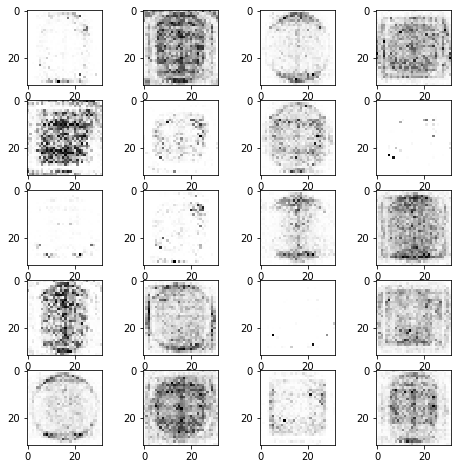


 32%|███▏      | 162/500 [07:04<18:16,  3.24s/it]

[161/500]: loss_d: 1.031244, loss_g: 1.526127



 33%|███▎      | 163/500 [07:07<16:39,  2.96s/it]

[162/500]: loss_d: 1.031542, loss_g: 1.523974



 33%|███▎      | 164/500 [07:09<15:26,  2.76s/it]

[163/500]: loss_d: 1.032106, loss_g: 1.522328



 33%|███▎      | 165/500 [07:11<14:52,  2.66s/it]

[164/500]: loss_d: 1.032624, loss_g: 1.520748



 33%|███▎      | 166/500 [07:15<15:46,  2.83s/it]

[165/500]: loss_d: 1.033483, loss_g: 1.518805



 33%|███▎      | 167/500 [07:17<14:39,  2.64s/it]

[166/500]: loss_d: 1.033931, loss_g: 1.517116



 34%|███▎      | 168/500 [07:19<13:48,  2.49s/it]

[167/500]: loss_d: 1.034191, loss_g: 1.515393



 34%|███▍      | 169/500 [07:21<13:30,  2.45s/it]

[168/500]: loss_d: 1.034684, loss_g: 1.513317



 34%|███▍      | 170/500 [07:24<13:13,  2.41s/it]

[169/500]: loss_d: 1.034855, loss_g: 1.512718



 34%|███▍      | 171/500 [07:26<12:59,  2.37s/it]

[170/500]: loss_d: 1.035494, loss_g: 1.511383



 34%|███▍      | 172/500 [07:28<12:53,  2.36s/it]

[171/500]: loss_d: 1.036144, loss_g: 1.509686



 35%|███▍      | 173/500 [07:31<13:17,  2.44s/it]

[172/500]: loss_d: 1.036795, loss_g: 1.508229



 35%|███▍      | 174/500 [07:33<13:02,  2.40s/it]

[173/500]: loss_d: 1.037007, loss_g: 1.506958



 35%|███▌      | 175/500 [07:35<12:49,  2.37s/it]

[174/500]: loss_d: 1.037273, loss_g: 1.506061



 35%|███▌      | 176/500 [07:38<12:31,  2.32s/it]

[175/500]: loss_d: 1.037719, loss_g: 1.504622



 35%|███▌      | 177/500 [07:40<12:28,  2.32s/it]

[176/500]: loss_d: 1.038156, loss_g: 1.502959



 36%|███▌      | 178/500 [07:43<13:55,  2.60s/it]

[177/500]: loss_d: 1.038466, loss_g: 1.501976



 36%|███▌      | 179/500 [07:46<13:29,  2.52s/it]

[178/500]: loss_d: 1.039293, loss_g: 1.500115



 36%|███▌      | 180/500 [07:48<13:42,  2.57s/it]

[179/500]: loss_d: 1.040009, loss_g: 1.498482
[180/500]: loss_d: 1.040631, loss_g: 1.496296


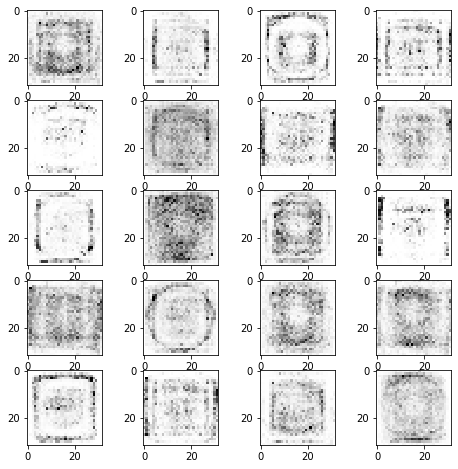


 36%|███▋      | 182/500 [07:55<15:46,  2.98s/it]

[181/500]: loss_d: 1.041557, loss_g: 1.494712



 37%|███▋      | 183/500 [07:58<15:36,  2.95s/it]

[182/500]: loss_d: 1.041569, loss_g: 1.493263



 37%|███▋      | 184/500 [08:01<14:43,  2.79s/it]

[183/500]: loss_d: 1.042265, loss_g: 1.491153



 37%|███▋      | 185/500 [08:03<13:41,  2.61s/it]

[184/500]: loss_d: 1.042899, loss_g: 1.490109



 37%|███▋      | 186/500 [08:06<13:51,  2.65s/it]

[185/500]: loss_d: 1.043512, loss_g: 1.488445



 37%|███▋      | 187/500 [08:08<13:21,  2.56s/it]

[186/500]: loss_d: 1.044072, loss_g: 1.486986



 38%|███▊      | 188/500 [08:11<14:07,  2.72s/it]

[187/500]: loss_d: 1.045154, loss_g: 1.485189



 38%|███▊      | 189/500 [08:14<13:29,  2.60s/it]

[188/500]: loss_d: 1.045557, loss_g: 1.483688



 38%|███▊      | 190/500 [08:16<12:47,  2.47s/it]

[189/500]: loss_d: 1.046135, loss_g: 1.482365



 38%|███▊      | 191/500 [08:18<12:52,  2.50s/it]

[190/500]: loss_d: 1.046754, loss_g: 1.480544



 38%|███▊      | 192/500 [08:20<12:17,  2.39s/it]

[191/500]: loss_d: 1.047332, loss_g: 1.479226



 39%|███▊      | 193/500 [08:23<12:03,  2.36s/it]

[192/500]: loss_d: 1.048052, loss_g: 1.478249



 39%|███▉      | 194/500 [08:25<11:44,  2.30s/it]

[193/500]: loss_d: 1.048370, loss_g: 1.477516



 39%|███▉      | 195/500 [08:27<11:41,  2.30s/it]

[194/500]: loss_d: 1.048593, loss_g: 1.476325



 39%|███▉      | 196/500 [08:30<11:46,  2.33s/it]

[195/500]: loss_d: 1.049304, loss_g: 1.474707



 39%|███▉      | 197/500 [08:32<11:50,  2.34s/it]

[196/500]: loss_d: 1.049891, loss_g: 1.473199



 40%|███▉      | 198/500 [08:34<11:56,  2.37s/it]

[197/500]: loss_d: 1.050391, loss_g: 1.471461



 40%|███▉      | 199/500 [08:37<11:51,  2.36s/it]

[198/500]: loss_d: 1.050987, loss_g: 1.470011



 40%|████      | 200/500 [08:39<11:52,  2.38s/it]

[199/500]: loss_d: 1.051629, loss_g: 1.467899
[200/500]: loss_d: 1.052379, loss_g: 1.466172


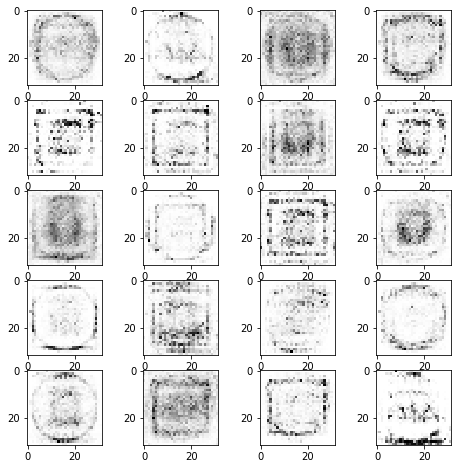


 40%|████      | 202/500 [08:48<16:03,  3.23s/it]

[201/500]: loss_d: 1.052688, loss_g: 1.464714



 41%|████      | 203/500 [08:50<15:00,  3.03s/it]

[202/500]: loss_d: 1.053355, loss_g: 1.463233



 41%|████      | 204/500 [08:52<13:41,  2.78s/it]

[203/500]: loss_d: 1.053873, loss_g: 1.462229



 41%|████      | 205/500 [08:55<13:02,  2.65s/it]

[204/500]: loss_d: 1.053556, loss_g: 1.461905



 41%|████      | 206/500 [08:57<12:44,  2.60s/it]

[205/500]: loss_d: 1.053990, loss_g: 1.460819



 41%|████▏     | 207/500 [09:00<12:29,  2.56s/it]

[206/500]: loss_d: 1.054624, loss_g: 1.459127



 42%|████▏     | 208/500 [09:03<13:04,  2.69s/it]

[207/500]: loss_d: 1.054958, loss_g: 1.457676



 42%|████▏     | 209/500 [09:05<12:17,  2.53s/it]

[208/500]: loss_d: 1.055422, loss_g: 1.456115



 42%|████▏     | 210/500 [09:07<12:12,  2.53s/it]

[209/500]: loss_d: 1.055786, loss_g: 1.454887



 42%|████▏     | 211/500 [09:09<11:38,  2.42s/it]

[210/500]: loss_d: 1.056206, loss_g: 1.453683



 42%|████▏     | 212/500 [09:12<11:32,  2.40s/it]

[211/500]: loss_d: 1.056735, loss_g: 1.452631



 43%|████▎     | 213/500 [09:14<11:20,  2.37s/it]

[212/500]: loss_d: 1.057389, loss_g: 1.450950



 43%|████▎     | 214/500 [09:17<12:19,  2.59s/it]

[213/500]: loss_d: 1.057757, loss_g: 1.449717



 43%|████▎     | 215/500 [09:20<12:04,  2.54s/it]

[214/500]: loss_d: 1.058195, loss_g: 1.448701



 43%|████▎     | 216/500 [09:22<11:42,  2.47s/it]

[215/500]: loss_d: 1.058897, loss_g: 1.446717



 43%|████▎     | 217/500 [09:24<11:24,  2.42s/it]

[216/500]: loss_d: 1.059629, loss_g: 1.444481



 44%|████▎     | 218/500 [09:27<11:11,  2.38s/it]

[217/500]: loss_d: 1.060412, loss_g: 1.442589



 44%|████▍     | 219/500 [09:29<11:04,  2.36s/it]

[218/500]: loss_d: 1.060906, loss_g: 1.441119



 44%|████▍     | 220/500 [09:31<10:59,  2.36s/it]

[219/500]: loss_d: 1.061151, loss_g: 1.440904
[220/500]: loss_d: 1.061543, loss_g: 1.440490


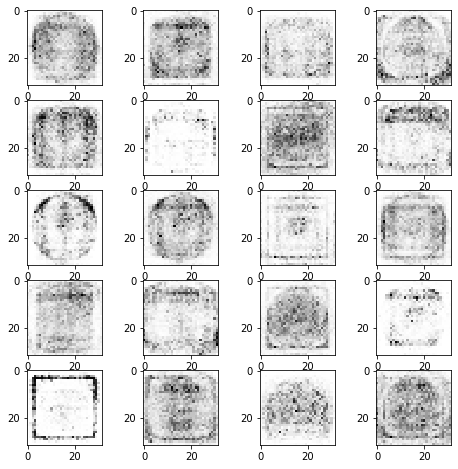


 44%|████▍     | 222/500 [09:39<14:01,  3.03s/it]

[221/500]: loss_d: 1.062221, loss_g: 1.438657



 45%|████▍     | 223/500 [09:42<13:25,  2.91s/it]

[222/500]: loss_d: 1.062462, loss_g: 1.437768



 45%|████▍     | 224/500 [09:44<12:41,  2.76s/it]

[223/500]: loss_d: 1.062902, loss_g: 1.437233



 45%|████▌     | 225/500 [09:46<12:04,  2.64s/it]

[224/500]: loss_d: 1.063453, loss_g: 1.435961



 45%|████▌     | 226/500 [09:49<11:36,  2.54s/it]

[225/500]: loss_d: 1.063716, loss_g: 1.435965



 45%|████▌     | 227/500 [09:51<11:40,  2.56s/it]

[226/500]: loss_d: 1.064343, loss_g: 1.434179



 46%|████▌     | 228/500 [09:54<12:02,  2.66s/it]

[227/500]: loss_d: 1.064827, loss_g: 1.432745



 46%|████▌     | 229/500 [09:58<13:04,  2.89s/it]

[228/500]: loss_d: 1.065108, loss_g: 1.431576



 46%|████▌     | 230/500 [10:00<12:04,  2.68s/it]

[229/500]: loss_d: 1.065634, loss_g: 1.430224



 46%|████▌     | 231/500 [10:02<11:19,  2.53s/it]

[230/500]: loss_d: 1.066107, loss_g: 1.428756



 46%|████▋     | 232/500 [10:04<11:08,  2.49s/it]

[231/500]: loss_d: 1.066714, loss_g: 1.426957



 47%|████▋     | 233/500 [10:07<11:14,  2.52s/it]

[232/500]: loss_d: 1.067314, loss_g: 1.425508



 47%|████▋     | 234/500 [10:10<11:24,  2.57s/it]

[233/500]: loss_d: 1.067960, loss_g: 1.423977



 47%|████▋     | 235/500 [10:13<12:19,  2.79s/it]

[234/500]: loss_d: 1.068012, loss_g: 1.423161



 47%|████▋     | 236/500 [10:15<11:40,  2.65s/it]

[235/500]: loss_d: 1.068491, loss_g: 1.422083



 47%|████▋     | 237/500 [10:18<11:34,  2.64s/it]

[236/500]: loss_d: 1.068546, loss_g: 1.421571



 48%|████▊     | 238/500 [10:21<12:36,  2.89s/it]

[237/500]: loss_d: 1.069027, loss_g: 1.420269



 48%|████▊     | 239/500 [10:24<11:57,  2.75s/it]

[238/500]: loss_d: 1.069399, loss_g: 1.419414



 48%|████▊     | 240/500 [10:27<12:23,  2.86s/it]

[239/500]: loss_d: 1.070021, loss_g: 1.418102
[240/500]: loss_d: 1.070221, loss_g: 1.417009


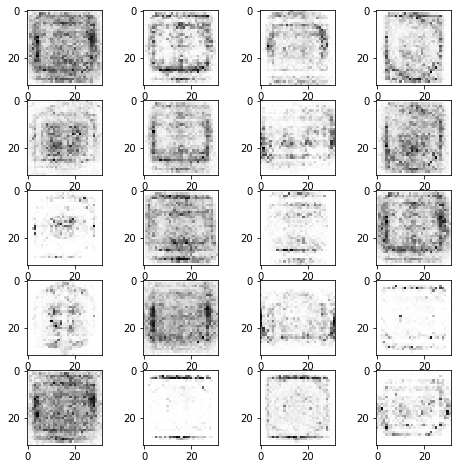


 48%|████▊     | 242/500 [10:34<13:06,  3.05s/it]

[241/500]: loss_d: 1.070512, loss_g: 1.415852



 49%|████▊     | 243/500 [10:36<12:22,  2.89s/it]

[242/500]: loss_d: 1.070933, loss_g: 1.414768



 49%|████▉     | 244/500 [10:38<11:29,  2.70s/it]

[243/500]: loss_d: 1.071171, loss_g: 1.414051



 49%|████▉     | 245/500 [10:41<10:48,  2.54s/it]

[244/500]: loss_d: 1.071614, loss_g: 1.413094



 49%|████▉     | 246/500 [10:43<10:18,  2.43s/it]

[245/500]: loss_d: 1.071606, loss_g: 1.412451



 49%|████▉     | 247/500 [10:45<09:53,  2.35s/it]

[246/500]: loss_d: 1.072014, loss_g: 1.411382



 50%|████▉     | 248/500 [10:47<09:36,  2.29s/it]

[247/500]: loss_d: 1.072461, loss_g: 1.410496



 50%|████▉     | 249/500 [10:49<09:26,  2.26s/it]

[248/500]: loss_d: 1.072884, loss_g: 1.409145



 50%|█████     | 250/500 [10:52<10:14,  2.46s/it]

[249/500]: loss_d: 1.073223, loss_g: 1.408471



 50%|█████     | 251/500 [10:54<09:52,  2.38s/it]

[250/500]: loss_d: 1.073697, loss_g: 1.407379



 50%|█████     | 252/500 [10:57<09:32,  2.31s/it]

[251/500]: loss_d: 1.074015, loss_g: 1.406457



 51%|█████     | 253/500 [10:59<10:02,  2.44s/it]

[252/500]: loss_d: 1.074481, loss_g: 1.405303



 51%|█████     | 254/500 [11:02<10:25,  2.54s/it]

[253/500]: loss_d: 1.074912, loss_g: 1.404140



 51%|█████     | 255/500 [11:05<10:24,  2.55s/it]

[254/500]: loss_d: 1.075266, loss_g: 1.403479



 51%|█████     | 256/500 [11:07<09:54,  2.44s/it]

[255/500]: loss_d: 1.075654, loss_g: 1.402413



 51%|█████▏    | 257/500 [11:09<09:32,  2.36s/it]

[256/500]: loss_d: 1.076105, loss_g: 1.401421



 52%|█████▏    | 258/500 [11:11<09:36,  2.38s/it]

[257/500]: loss_d: 1.076565, loss_g: 1.400282



 52%|█████▏    | 259/500 [11:14<09:18,  2.32s/it]

[258/500]: loss_d: 1.076589, loss_g: 1.400299



 52%|█████▏    | 260/500 [11:16<09:18,  2.33s/it]

[259/500]: loss_d: 1.076915, loss_g: 1.399156
[260/500]: loss_d: 1.076987, loss_g: 1.398782


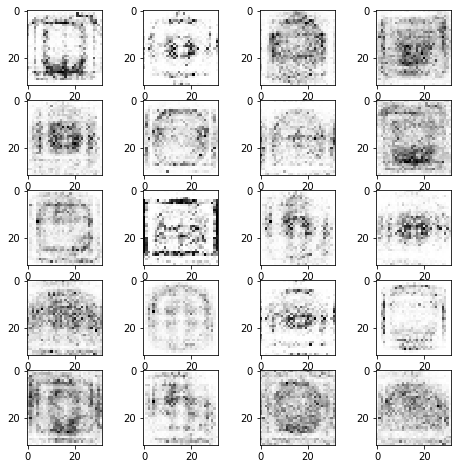


 52%|█████▏    | 262/500 [11:22<10:41,  2.70s/it]

[261/500]: loss_d: 1.077155, loss_g: 1.398219



 53%|█████▎    | 263/500 [11:25<10:47,  2.73s/it]

[262/500]: loss_d: 1.077434, loss_g: 1.397488



 53%|█████▎    | 264/500 [11:28<10:25,  2.65s/it]

[263/500]: loss_d: 1.077819, loss_g: 1.396713



 53%|█████▎    | 265/500 [11:30<09:56,  2.54s/it]

[264/500]: loss_d: 1.078169, loss_g: 1.395692



 53%|█████▎    | 266/500 [11:33<10:02,  2.58s/it]

[265/500]: loss_d: 1.078517, loss_g: 1.394963



 53%|█████▎    | 267/500 [11:35<09:53,  2.55s/it]

[266/500]: loss_d: 1.078846, loss_g: 1.393651



 54%|█████▎    | 268/500 [11:37<09:25,  2.44s/it]

[267/500]: loss_d: 1.079165, loss_g: 1.392860



 54%|█████▍    | 269/500 [11:40<09:22,  2.43s/it]

[268/500]: loss_d: 1.079573, loss_g: 1.391788



 54%|█████▍    | 270/500 [11:42<09:14,  2.41s/it]

[269/500]: loss_d: 1.080015, loss_g: 1.390853



 54%|█████▍    | 271/500 [11:45<09:53,  2.59s/it]

[270/500]: loss_d: 1.080193, loss_g: 1.390458



 54%|█████▍    | 272/500 [11:47<09:36,  2.53s/it]

[271/500]: loss_d: 1.080484, loss_g: 1.389714



 55%|█████▍    | 273/500 [11:50<09:21,  2.47s/it]

[272/500]: loss_d: 1.080920, loss_g: 1.388854



 55%|█████▍    | 274/500 [11:52<09:16,  2.46s/it]

[273/500]: loss_d: 1.081317, loss_g: 1.387755



 55%|█████▌    | 275/500 [11:55<09:06,  2.43s/it]

[274/500]: loss_d: 1.081726, loss_g: 1.386710



 55%|█████▌    | 276/500 [11:57<08:59,  2.41s/it]

[275/500]: loss_d: 1.081967, loss_g: 1.385961



 55%|█████▌    | 277/500 [11:59<08:49,  2.38s/it]

[276/500]: loss_d: 1.082046, loss_g: 1.385390



 56%|█████▌    | 278/500 [12:01<08:33,  2.31s/it]

[277/500]: loss_d: 1.082530, loss_g: 1.384334



 56%|█████▌    | 279/500 [12:04<08:38,  2.35s/it]

[278/500]: loss_d: 1.082774, loss_g: 1.383753



 56%|█████▌    | 280/500 [12:06<08:53,  2.43s/it]

[279/500]: loss_d: 1.083216, loss_g: 1.382942
[280/500]: loss_d: 1.083472, loss_g: 1.382223


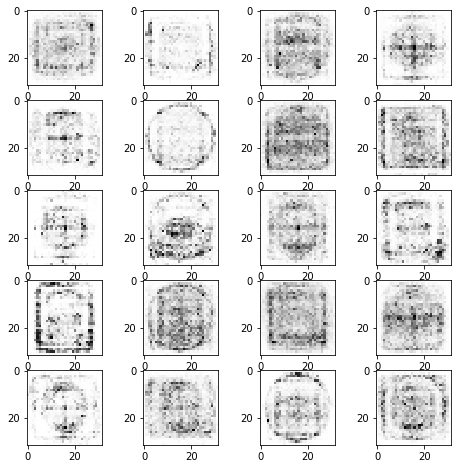


 56%|█████▋    | 282/500 [12:14<11:20,  3.12s/it]

[281/500]: loss_d: 1.083672, loss_g: 1.381275



 57%|█████▋    | 283/500 [12:17<11:05,  3.07s/it]

[282/500]: loss_d: 1.084202, loss_g: 1.380114



 57%|█████▋    | 284/500 [12:20<10:16,  2.85s/it]

[283/500]: loss_d: 1.084436, loss_g: 1.379411



 57%|█████▋    | 285/500 [12:22<09:27,  2.64s/it]

[284/500]: loss_d: 1.084830, loss_g: 1.378539



 57%|█████▋    | 286/500 [12:24<09:09,  2.57s/it]

[285/500]: loss_d: 1.085151, loss_g: 1.377483



 57%|█████▋    | 287/500 [12:27<09:52,  2.78s/it]

[286/500]: loss_d: 1.085621, loss_g: 1.376590



 58%|█████▊    | 288/500 [12:30<09:45,  2.76s/it]

[287/500]: loss_d: 1.085960, loss_g: 1.375741



 58%|█████▊    | 289/500 [12:32<09:06,  2.59s/it]

[288/500]: loss_d: 1.086480, loss_g: 1.374783



 58%|█████▊    | 290/500 [12:34<08:35,  2.45s/it]

[289/500]: loss_d: 1.086928, loss_g: 1.373697



 58%|█████▊    | 291/500 [12:37<09:05,  2.61s/it]

[290/500]: loss_d: 1.087028, loss_g: 1.373176



 58%|█████▊    | 292/500 [12:40<09:00,  2.60s/it]

[291/500]: loss_d: 1.087362, loss_g: 1.372743



 59%|█████▊    | 293/500 [12:42<08:30,  2.47s/it]

[292/500]: loss_d: 1.087553, loss_g: 1.372237



 59%|█████▉    | 294/500 [12:44<08:10,  2.38s/it]

[293/500]: loss_d: 1.087854, loss_g: 1.372146



 59%|█████▉    | 295/500 [12:46<07:54,  2.31s/it]

[294/500]: loss_d: 1.087994, loss_g: 1.371502



 59%|█████▉    | 296/500 [12:50<08:58,  2.64s/it]

[295/500]: loss_d: 1.088194, loss_g: 1.370990



 59%|█████▉    | 297/500 [12:53<09:22,  2.77s/it]

[296/500]: loss_d: 1.088579, loss_g: 1.370176



 60%|█████▉    | 298/500 [12:55<08:56,  2.66s/it]

[297/500]: loss_d: 1.088795, loss_g: 1.370394



 60%|█████▉    | 299/500 [12:58<08:51,  2.64s/it]

[298/500]: loss_d: 1.088909, loss_g: 1.370338



 60%|██████    | 300/500 [13:00<08:41,  2.61s/it]

[299/500]: loss_d: 1.089083, loss_g: 1.369624
[300/500]: loss_d: 1.089363, loss_g: 1.369165


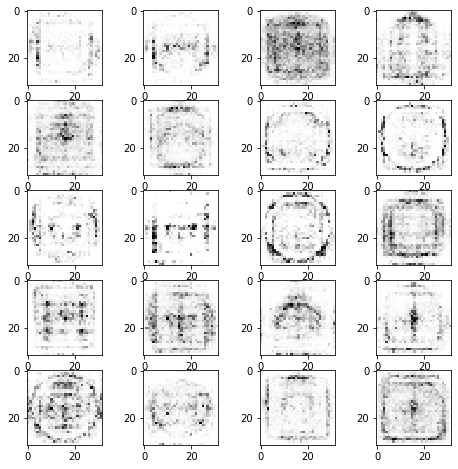


 60%|██████    | 302/500 [13:08<10:15,  3.11s/it]

[301/500]: loss_d: 1.089787, loss_g: 1.368090



 61%|██████    | 303/500 [13:11<10:19,  3.14s/it]

[302/500]: loss_d: 1.090006, loss_g: 1.367582



 61%|██████    | 304/500 [13:13<09:18,  2.85s/it]

[303/500]: loss_d: 1.090316, loss_g: 1.367126



 61%|██████    | 305/500 [13:15<08:35,  2.64s/it]

[304/500]: loss_d: 1.090442, loss_g: 1.366811



 61%|██████    | 306/500 [13:19<09:14,  2.86s/it]

[305/500]: loss_d: 1.090651, loss_g: 1.365993



 61%|██████▏   | 307/500 [13:21<08:46,  2.73s/it]

[306/500]: loss_d: 1.090753, loss_g: 1.365481



 62%|██████▏   | 308/500 [13:24<08:50,  2.76s/it]

[307/500]: loss_d: 1.090862, loss_g: 1.365048



 62%|██████▏   | 309/500 [13:26<08:13,  2.58s/it]

[308/500]: loss_d: 1.090958, loss_g: 1.364372



 62%|██████▏   | 310/500 [13:29<08:23,  2.65s/it]

[309/500]: loss_d: 1.091333, loss_g: 1.363742



 62%|██████▏   | 311/500 [13:32<08:47,  2.79s/it]

[310/500]: loss_d: 1.091673, loss_g: 1.362811



 62%|██████▏   | 312/500 [13:35<08:54,  2.84s/it]

[311/500]: loss_d: 1.091748, loss_g: 1.362300



 63%|██████▎   | 313/500 [13:38<08:28,  2.72s/it]

[312/500]: loss_d: 1.092245, loss_g: 1.361077



 63%|██████▎   | 314/500 [13:40<08:18,  2.68s/it]

[313/500]: loss_d: 1.092567, loss_g: 1.360137



 63%|██████▎   | 315/500 [13:42<07:48,  2.53s/it]

[314/500]: loss_d: 1.092871, loss_g: 1.359122



 63%|██████▎   | 316/500 [13:45<07:36,  2.48s/it]

[315/500]: loss_d: 1.093182, loss_g: 1.358584



 63%|██████▎   | 317/500 [13:47<07:16,  2.39s/it]

[316/500]: loss_d: 1.093498, loss_g: 1.357845



 64%|██████▎   | 318/500 [13:49<07:10,  2.37s/it]

[317/500]: loss_d: 1.093773, loss_g: 1.356874



 64%|██████▍   | 319/500 [13:51<06:57,  2.31s/it]

[318/500]: loss_d: 1.094193, loss_g: 1.355862



 64%|██████▍   | 320/500 [13:54<06:48,  2.27s/it]

[319/500]: loss_d: 1.094510, loss_g: 1.354927
[320/500]: loss_d: 1.094583, loss_g: 1.354901


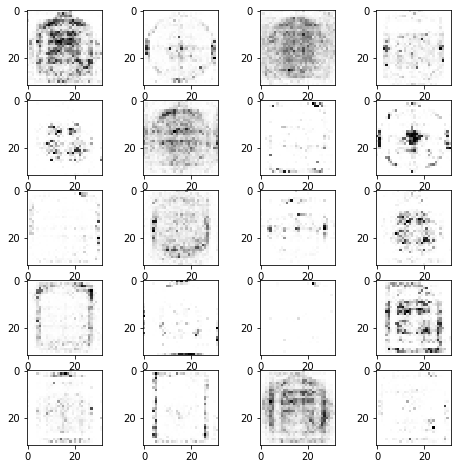


 64%|██████▍   | 322/500 [14:00<08:12,  2.77s/it]

[321/500]: loss_d: 1.094804, loss_g: 1.354551



 65%|██████▍   | 323/500 [14:03<08:13,  2.79s/it]

[322/500]: loss_d: 1.095182, loss_g: 1.353530



 65%|██████▍   | 324/500 [14:05<07:41,  2.62s/it]

[323/500]: loss_d: 1.095557, loss_g: 1.352559



 65%|██████▌   | 325/500 [14:08<07:31,  2.58s/it]

[324/500]: loss_d: 1.096152, loss_g: 1.351684



 65%|██████▌   | 326/500 [14:10<07:28,  2.58s/it]

[325/500]: loss_d: 1.096296, loss_g: 1.351706



 65%|██████▌   | 327/500 [14:13<07:40,  2.66s/it]

[326/500]: loss_d: 1.096667, loss_g: 1.350726



 66%|██████▌   | 328/500 [14:16<07:22,  2.57s/it]

[327/500]: loss_d: 1.096928, loss_g: 1.349959



 66%|██████▌   | 329/500 [14:18<07:11,  2.52s/it]

[328/500]: loss_d: 1.097105, loss_g: 1.349372



 66%|██████▌   | 330/500 [14:21<07:39,  2.70s/it]

[329/500]: loss_d: 1.097422, loss_g: 1.348524



 66%|██████▌   | 331/500 [14:24<07:47,  2.76s/it]

[330/500]: loss_d: 1.097716, loss_g: 1.347619



 66%|██████▋   | 332/500 [14:27<07:42,  2.75s/it]

[331/500]: loss_d: 1.098044, loss_g: 1.346691



 67%|██████▋   | 333/500 [14:30<07:55,  2.85s/it]

[332/500]: loss_d: 1.098340, loss_g: 1.345918



 67%|██████▋   | 334/500 [14:32<07:27,  2.70s/it]

[333/500]: loss_d: 1.098489, loss_g: 1.345449



 67%|██████▋   | 335/500 [14:34<06:59,  2.54s/it]

[334/500]: loss_d: 1.098905, loss_g: 1.344442



 67%|██████▋   | 336/500 [14:37<06:49,  2.49s/it]

[335/500]: loss_d: 1.099392, loss_g: 1.343836



 67%|██████▋   | 337/500 [14:39<06:30,  2.40s/it]

[336/500]: loss_d: 1.099590, loss_g: 1.343222



 68%|██████▊   | 338/500 [14:41<06:25,  2.38s/it]

[337/500]: loss_d: 1.099816, loss_g: 1.342331



 68%|██████▊   | 339/500 [14:44<06:44,  2.51s/it]

[338/500]: loss_d: 1.100124, loss_g: 1.341422



 68%|██████▊   | 340/500 [14:47<06:56,  2.61s/it]

[339/500]: loss_d: 1.100532, loss_g: 1.340698
[340/500]: loss_d: 1.100968, loss_g: 1.339809


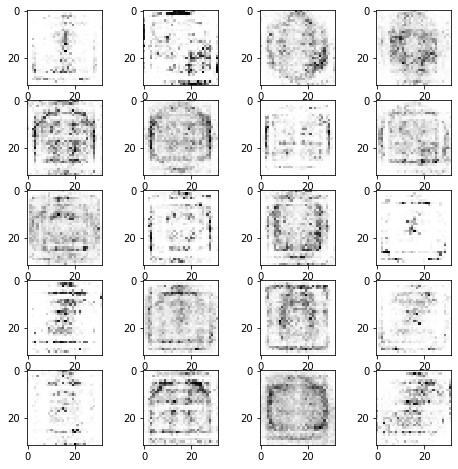


 68%|██████▊   | 342/500 [14:55<08:32,  3.24s/it]

[341/500]: loss_d: 1.101014, loss_g: 1.339611



 69%|██████▊   | 343/500 [14:58<08:25,  3.22s/it]

[342/500]: loss_d: 1.101295, loss_g: 1.338972



 69%|██████▉   | 344/500 [15:06<11:49,  4.55s/it]

[343/500]: loss_d: 1.101536, loss_g: 1.338646



 69%|██████▉   | 345/500 [15:09<11:00,  4.26s/it]

[344/500]: loss_d: 1.101808, loss_g: 1.337994



 69%|██████▉   | 346/500 [15:12<10:01,  3.91s/it]

[345/500]: loss_d: 1.101988, loss_g: 1.337185



 69%|██████▉   | 347/500 [15:16<09:39,  3.78s/it]

[346/500]: loss_d: 1.102234, loss_g: 1.336565



 70%|██████▉   | 348/500 [15:19<09:15,  3.65s/it]

[347/500]: loss_d: 1.102657, loss_g: 1.336367



 70%|██████▉   | 349/500 [15:23<09:03,  3.60s/it]

[348/500]: loss_d: 1.102837, loss_g: 1.336294



 70%|███████   | 350/500 [15:26<08:38,  3.46s/it]

[349/500]: loss_d: 1.103193, loss_g: 1.335774



 70%|███████   | 351/500 [15:28<07:38,  3.07s/it]

[350/500]: loss_d: 1.103471, loss_g: 1.335113



 70%|███████   | 352/500 [15:30<06:54,  2.80s/it]

[351/500]: loss_d: 1.103948, loss_g: 1.334329



 71%|███████   | 353/500 [15:33<06:34,  2.69s/it]

[352/500]: loss_d: 1.104247, loss_g: 1.333698



 71%|███████   | 354/500 [15:35<06:19,  2.60s/it]

[353/500]: loss_d: 1.104449, loss_g: 1.333157



 71%|███████   | 355/500 [15:38<06:23,  2.65s/it]

[354/500]: loss_d: 1.104585, loss_g: 1.332934



 71%|███████   | 356/500 [15:40<06:13,  2.60s/it]

[355/500]: loss_d: 1.104705, loss_g: 1.332672



 71%|███████▏  | 357/500 [15:42<05:53,  2.47s/it]

[356/500]: loss_d: 1.104876, loss_g: 1.332127



 72%|███████▏  | 358/500 [15:45<05:37,  2.38s/it]

[357/500]: loss_d: 1.105048, loss_g: 1.331867



 72%|███████▏  | 359/500 [15:48<05:58,  2.54s/it]

[358/500]: loss_d: 1.105284, loss_g: 1.331092



 72%|███████▏  | 360/500 [15:50<05:46,  2.47s/it]

[359/500]: loss_d: 1.105554, loss_g: 1.330568
[360/500]: loss_d: 1.105897, loss_g: 1.329826


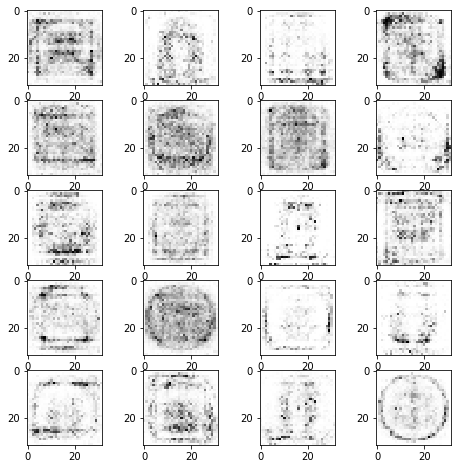


 72%|███████▏  | 362/500 [15:56<06:27,  2.80s/it]

[361/500]: loss_d: 1.106140, loss_g: 1.329060



 73%|███████▎  | 363/500 [15:59<05:58,  2.62s/it]

[362/500]: loss_d: 1.106272, loss_g: 1.328854



 73%|███████▎  | 364/500 [16:02<06:31,  2.88s/it]

[363/500]: loss_d: 1.106466, loss_g: 1.328373



 73%|███████▎  | 365/500 [16:05<06:33,  2.92s/it]

[364/500]: loss_d: 1.106923, loss_g: 1.327601



 73%|███████▎  | 366/500 [16:08<06:13,  2.79s/it]

[365/500]: loss_d: 1.106991, loss_g: 1.327480



 73%|███████▎  | 367/500 [16:10<05:58,  2.70s/it]

[366/500]: loss_d: 1.107266, loss_g: 1.326881



 74%|███████▎  | 368/500 [16:13<06:02,  2.75s/it]

[367/500]: loss_d: 1.107479, loss_g: 1.326273



 74%|███████▍  | 369/500 [16:15<05:37,  2.57s/it]

[368/500]: loss_d: 1.107723, loss_g: 1.325623



 74%|███████▍  | 370/500 [16:17<05:18,  2.45s/it]

[369/500]: loss_d: 1.108008, loss_g: 1.324872



 74%|███████▍  | 371/500 [16:19<05:05,  2.37s/it]

[370/500]: loss_d: 1.108196, loss_g: 1.324316



 74%|███████▍  | 372/500 [16:22<05:00,  2.35s/it]

[371/500]: loss_d: 1.108410, loss_g: 1.323787



 75%|███████▍  | 373/500 [16:24<04:52,  2.30s/it]

[372/500]: loss_d: 1.108722, loss_g: 1.322829



 75%|███████▍  | 374/500 [16:26<04:49,  2.30s/it]

[373/500]: loss_d: 1.108809, loss_g: 1.322484



 75%|███████▌  | 375/500 [16:29<04:52,  2.34s/it]

[374/500]: loss_d: 1.109032, loss_g: 1.321706



 75%|███████▌  | 376/500 [16:31<04:50,  2.35s/it]

[375/500]: loss_d: 1.109305, loss_g: 1.321014



 75%|███████▌  | 377/500 [16:33<04:42,  2.29s/it]

[376/500]: loss_d: 1.109491, loss_g: 1.320827



 76%|███████▌  | 378/500 [16:36<04:38,  2.28s/it]

[377/500]: loss_d: 1.109808, loss_g: 1.319896



 76%|███████▌  | 379/500 [16:38<04:36,  2.29s/it]

[378/500]: loss_d: 1.110055, loss_g: 1.319441



 76%|███████▌  | 380/500 [16:40<04:37,  2.31s/it]

[379/500]: loss_d: 1.110390, loss_g: 1.318502
[380/500]: loss_d: 1.110750, loss_g: 1.317747


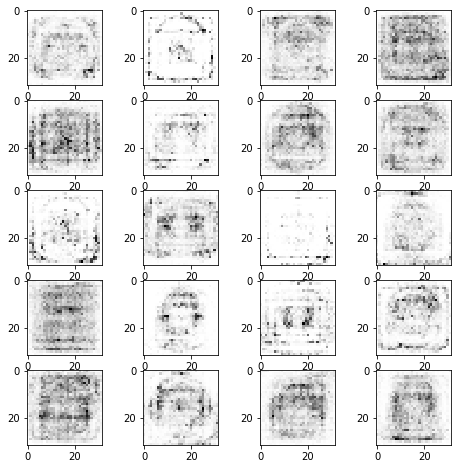


 76%|███████▋  | 382/500 [16:47<05:29,  2.80s/it]

[381/500]: loss_d: 1.111001, loss_g: 1.316990



 77%|███████▋  | 383/500 [16:50<05:30,  2.82s/it]

[382/500]: loss_d: 1.111239, loss_g: 1.316363



 77%|███████▋  | 384/500 [16:52<05:05,  2.63s/it]

[383/500]: loss_d: 1.111517, loss_g: 1.315742



 77%|███████▋  | 385/500 [16:54<04:46,  2.49s/it]

[384/500]: loss_d: 1.111724, loss_g: 1.315212



 77%|███████▋  | 386/500 [16:57<04:34,  2.41s/it]

[385/500]: loss_d: 1.111905, loss_g: 1.315218



 77%|███████▋  | 387/500 [16:59<04:30,  2.39s/it]

[386/500]: loss_d: 1.112022, loss_g: 1.314927



 78%|███████▊  | 388/500 [17:01<04:26,  2.38s/it]

[387/500]: loss_d: 1.112118, loss_g: 1.314478



 78%|███████▊  | 389/500 [17:03<04:17,  2.32s/it]

[388/500]: loss_d: 1.112309, loss_g: 1.315492



 78%|███████▊  | 390/500 [17:06<04:17,  2.34s/it]

[389/500]: loss_d: 1.112698, loss_g: 1.315067



 78%|███████▊  | 391/500 [17:08<04:11,  2.30s/it]

[390/500]: loss_d: 1.112807, loss_g: 1.315098



 78%|███████▊  | 392/500 [17:10<04:10,  2.32s/it]

[391/500]: loss_d: 1.112927, loss_g: 1.314909



 79%|███████▊  | 393/500 [17:13<04:08,  2.32s/it]

[392/500]: loss_d: 1.113010, loss_g: 1.314715



 79%|███████▉  | 394/500 [17:15<04:00,  2.27s/it]

[393/500]: loss_d: 1.113080, loss_g: 1.314543



 79%|███████▉  | 395/500 [17:17<03:59,  2.28s/it]

[394/500]: loss_d: 1.113251, loss_g: 1.314087



 79%|███████▉  | 396/500 [17:19<03:58,  2.29s/it]

[395/500]: loss_d: 1.113410, loss_g: 1.313612



 79%|███████▉  | 397/500 [17:22<03:51,  2.25s/it]

[396/500]: loss_d: 1.113489, loss_g: 1.313126



 80%|███████▉  | 398/500 [17:25<04:13,  2.49s/it]

[397/500]: loss_d: 1.113621, loss_g: 1.312765



 80%|███████▉  | 399/500 [17:27<04:15,  2.53s/it]

[398/500]: loss_d: 1.113756, loss_g: 1.312460



 80%|████████  | 400/500 [17:30<04:03,  2.44s/it]

[399/500]: loss_d: 1.113837, loss_g: 1.311942
[400/500]: loss_d: 1.113969, loss_g: 1.311694


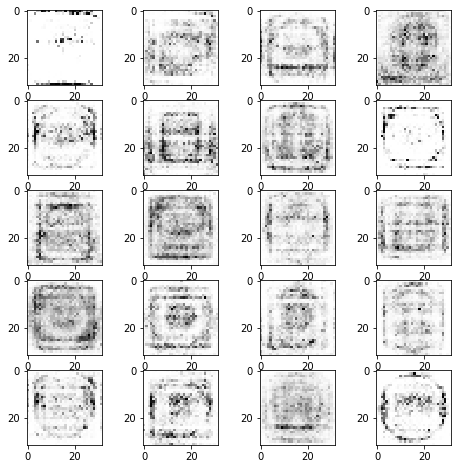


 80%|████████  | 402/500 [17:37<04:50,  2.96s/it]

[401/500]: loss_d: 1.114048, loss_g: 1.311622



 81%|████████  | 403/500 [17:40<04:44,  2.93s/it]

[402/500]: loss_d: 1.114187, loss_g: 1.311252



 81%|████████  | 404/500 [17:42<04:28,  2.79s/it]

[403/500]: loss_d: 1.114336, loss_g: 1.310910



 81%|████████  | 405/500 [17:44<04:08,  2.61s/it]

[404/500]: loss_d: 1.114490, loss_g: 1.310394



 81%|████████  | 406/500 [17:47<03:52,  2.48s/it]

[405/500]: loss_d: 1.114606, loss_g: 1.310075



 81%|████████▏ | 407/500 [17:49<03:48,  2.46s/it]

[406/500]: loss_d: 1.114850, loss_g: 1.309816



 82%|████████▏ | 408/500 [17:51<03:42,  2.42s/it]

[407/500]: loss_d: 1.114929, loss_g: 1.309715



 82%|████████▏ | 409/500 [17:54<03:48,  2.51s/it]

[408/500]: loss_d: 1.115107, loss_g: 1.309286



 82%|████████▏ | 410/500 [17:56<03:42,  2.47s/it]

[409/500]: loss_d: 1.115267, loss_g: 1.308854



 82%|████████▏ | 411/500 [17:59<03:45,  2.54s/it]

[410/500]: loss_d: 1.115452, loss_g: 1.308566



 82%|████████▏ | 412/500 [18:01<03:34,  2.43s/it]

[411/500]: loss_d: 1.115631, loss_g: 1.307919



 83%|████████▎ | 413/500 [18:04<03:33,  2.45s/it]

[412/500]: loss_d: 1.115841, loss_g: 1.307285



 83%|████████▎ | 414/500 [18:06<03:36,  2.52s/it]

[413/500]: loss_d: 1.116041, loss_g: 1.306740



 83%|████████▎ | 415/500 [18:09<03:31,  2.48s/it]

[414/500]: loss_d: 1.116261, loss_g: 1.306087



 83%|████████▎ | 416/500 [18:12<03:46,  2.69s/it]

[415/500]: loss_d: 1.116373, loss_g: 1.305747



 83%|████████▎ | 417/500 [18:15<03:45,  2.72s/it]

[416/500]: loss_d: 1.116337, loss_g: 1.305857



 84%|████████▎ | 418/500 [18:17<03:29,  2.56s/it]

[417/500]: loss_d: 1.116460, loss_g: 1.305642



 84%|████████▍ | 419/500 [18:20<03:30,  2.59s/it]

[418/500]: loss_d: 1.116565, loss_g: 1.305306



 84%|████████▍ | 420/500 [18:22<03:19,  2.49s/it]

[419/500]: loss_d: 1.116756, loss_g: 1.304730
[420/500]: loss_d: 1.117035, loss_g: 1.304200


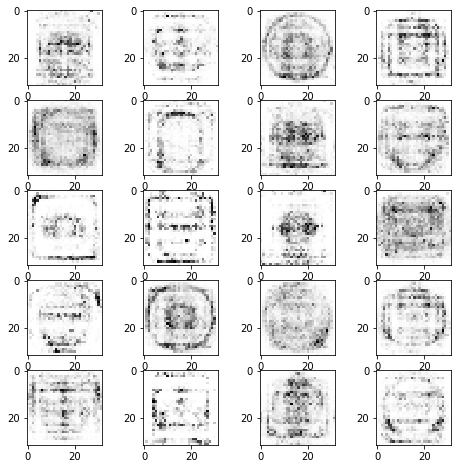


 84%|████████▍ | 422/500 [18:28<03:37,  2.79s/it]

[421/500]: loss_d: 1.117096, loss_g: 1.303879



 85%|████████▍ | 423/500 [18:31<03:23,  2.64s/it]

[422/500]: loss_d: 1.117198, loss_g: 1.303467



 85%|████████▍ | 424/500 [18:33<03:21,  2.66s/it]

[423/500]: loss_d: 1.117482, loss_g: 1.302897



 85%|████████▌ | 425/500 [18:36<03:14,  2.59s/it]

[424/500]: loss_d: 1.117718, loss_g: 1.302223



 85%|████████▌ | 426/500 [18:38<03:02,  2.47s/it]

[425/500]: loss_d: 1.117835, loss_g: 1.301878



 85%|████████▌ | 427/500 [18:40<02:58,  2.44s/it]

[426/500]: loss_d: 1.118171, loss_g: 1.301141



 86%|████████▌ | 428/500 [18:43<02:58,  2.47s/it]

[427/500]: loss_d: 1.118411, loss_g: 1.300581



 86%|████████▌ | 429/500 [18:46<03:06,  2.62s/it]

[428/500]: loss_d: 1.118571, loss_g: 1.300034



 86%|████████▌ | 430/500 [18:48<03:00,  2.58s/it]

[429/500]: loss_d: 1.118782, loss_g: 1.299497



 86%|████████▌ | 431/500 [18:51<02:58,  2.58s/it]

[430/500]: loss_d: 1.118892, loss_g: 1.299259



 86%|████████▋ | 432/500 [18:54<02:57,  2.61s/it]

[431/500]: loss_d: 1.119094, loss_g: 1.299569



 87%|████████▋ | 433/500 [18:56<02:47,  2.50s/it]

[432/500]: loss_d: 1.119298, loss_g: 1.298885



 87%|████████▋ | 434/500 [18:58<02:40,  2.44s/it]

[433/500]: loss_d: 1.119504, loss_g: 1.298565



 87%|████████▋ | 435/500 [19:00<02:32,  2.35s/it]

[434/500]: loss_d: 1.119789, loss_g: 1.297753



 87%|████████▋ | 436/500 [19:03<02:27,  2.30s/it]

[435/500]: loss_d: 1.119871, loss_g: 1.297565



 87%|████████▋ | 437/500 [19:05<02:22,  2.26s/it]

[436/500]: loss_d: 1.120148, loss_g: 1.297071



 88%|████████▊ | 438/500 [19:07<02:18,  2.23s/it]

[437/500]: loss_d: 1.120196, loss_g: 1.296791



 88%|████████▊ | 439/500 [19:09<02:15,  2.22s/it]

[438/500]: loss_d: 1.120260, loss_g: 1.296625



 88%|████████▊ | 440/500 [19:11<02:12,  2.21s/it]

[439/500]: loss_d: 1.120342, loss_g: 1.296288
[440/500]: loss_d: 1.120463, loss_g: 1.295940


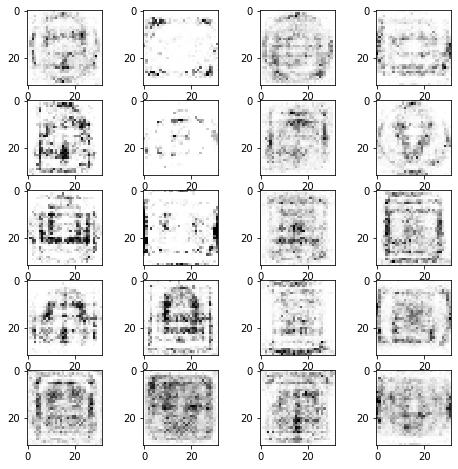


 88%|████████▊ | 442/500 [19:17<02:28,  2.56s/it]

[441/500]: loss_d: 1.120652, loss_g: 1.295496



 89%|████████▊ | 443/500 [19:20<02:19,  2.44s/it]

[442/500]: loss_d: 1.120774, loss_g: 1.295293



 89%|████████▉ | 444/500 [19:22<02:12,  2.36s/it]

[443/500]: loss_d: 1.120936, loss_g: 1.294722



 89%|████████▉ | 445/500 [19:24<02:06,  2.29s/it]

[444/500]: loss_d: 1.121073, loss_g: 1.294494



 89%|████████▉ | 446/500 [19:26<02:01,  2.25s/it]

[445/500]: loss_d: 1.121204, loss_g: 1.294113



 89%|████████▉ | 447/500 [19:28<01:57,  2.21s/it]

[446/500]: loss_d: 1.121326, loss_g: 1.293651



 90%|████████▉ | 448/500 [19:30<01:53,  2.19s/it]

[447/500]: loss_d: 1.121506, loss_g: 1.293149



 90%|████████▉ | 449/500 [19:32<01:51,  2.18s/it]

[448/500]: loss_d: 1.121657, loss_g: 1.292898



 90%|█████████ | 450/500 [19:35<01:48,  2.18s/it]

[449/500]: loss_d: 1.121791, loss_g: 1.292692



 90%|█████████ | 451/500 [19:37<01:46,  2.18s/it]

[450/500]: loss_d: 1.121787, loss_g: 1.292747



 90%|█████████ | 452/500 [19:39<01:44,  2.18s/it]

[451/500]: loss_d: 1.121871, loss_g: 1.292497



 91%|█████████ | 453/500 [19:41<01:41,  2.17s/it]

[452/500]: loss_d: 1.122011, loss_g: 1.292049



 91%|█████████ | 454/500 [19:43<01:39,  2.16s/it]

[453/500]: loss_d: 1.122228, loss_g: 1.291608



 91%|█████████ | 455/500 [19:45<01:37,  2.16s/it]

[454/500]: loss_d: 1.122229, loss_g: 1.291378



 91%|█████████ | 456/500 [19:48<01:35,  2.17s/it]

[455/500]: loss_d: 1.122497, loss_g: 1.290847



 91%|█████████▏| 457/500 [19:50<01:32,  2.15s/it]

[456/500]: loss_d: 1.122548, loss_g: 1.290710



 92%|█████████▏| 458/500 [19:52<01:30,  2.15s/it]

[457/500]: loss_d: 1.122739, loss_g: 1.290266



 92%|█████████▏| 459/500 [19:54<01:28,  2.15s/it]

[458/500]: loss_d: 1.122839, loss_g: 1.290002



 92%|█████████▏| 460/500 [19:56<01:25,  2.15s/it]

[459/500]: loss_d: 1.123051, loss_g: 1.289497
[460/500]: loss_d: 1.123173, loss_g: 1.289060


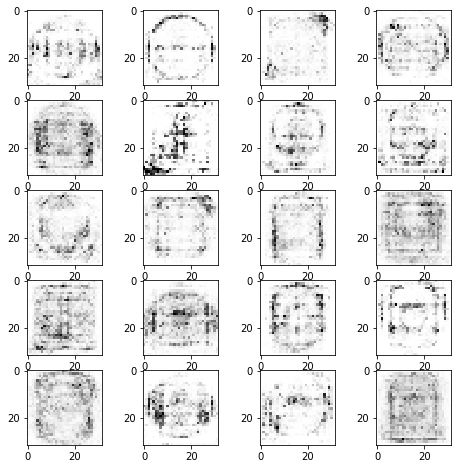


 92%|█████████▏| 462/500 [20:02<01:37,  2.57s/it]

[461/500]: loss_d: 1.123221, loss_g: 1.288675



 93%|█████████▎| 463/500 [20:05<01:31,  2.46s/it]

[462/500]: loss_d: 1.123360, loss_g: 1.288177



 93%|█████████▎| 464/500 [20:07<01:25,  2.38s/it]

[463/500]: loss_d: 1.123468, loss_g: 1.287801



 93%|█████████▎| 465/500 [20:09<01:21,  2.32s/it]

[464/500]: loss_d: 1.123729, loss_g: 1.287277



 93%|█████████▎| 466/500 [20:11<01:17,  2.29s/it]

[465/500]: loss_d: 1.123856, loss_g: 1.286877



 93%|█████████▎| 467/500 [20:13<01:14,  2.25s/it]

[466/500]: loss_d: 1.123869, loss_g: 1.286816



 94%|█████████▎| 468/500 [20:16<01:10,  2.22s/it]

[467/500]: loss_d: 1.124079, loss_g: 1.286752



 94%|█████████▍| 469/500 [20:18<01:08,  2.20s/it]

[468/500]: loss_d: 1.124120, loss_g: 1.286414



 94%|█████████▍| 470/500 [20:20<01:05,  2.19s/it]

[469/500]: loss_d: 1.124237, loss_g: 1.286018



 94%|█████████▍| 471/500 [20:22<01:03,  2.18s/it]

[470/500]: loss_d: 1.124396, loss_g: 1.285732



 94%|█████████▍| 472/500 [20:24<01:00,  2.17s/it]

[471/500]: loss_d: 1.124599, loss_g: 1.285331



 95%|█████████▍| 473/500 [20:26<00:58,  2.18s/it]

[472/500]: loss_d: 1.124716, loss_g: 1.285091



 95%|█████████▍| 474/500 [20:29<00:56,  2.17s/it]

[473/500]: loss_d: 1.124932, loss_g: 1.284574



 95%|█████████▌| 475/500 [20:31<00:54,  2.17s/it]

[474/500]: loss_d: 1.125044, loss_g: 1.284213



 95%|█████████▌| 476/500 [20:33<00:51,  2.17s/it]

[475/500]: loss_d: 1.125321, loss_g: 1.283457



 95%|█████████▌| 477/500 [20:35<00:49,  2.16s/it]

[476/500]: loss_d: 1.125517, loss_g: 1.282948



 96%|█████████▌| 478/500 [20:37<00:47,  2.17s/it]

[477/500]: loss_d: 1.125743, loss_g: 1.282393



 96%|█████████▌| 479/500 [20:39<00:45,  2.15s/it]

[478/500]: loss_d: 1.125805, loss_g: 1.282187



 96%|█████████▌| 480/500 [20:41<00:43,  2.15s/it]

[479/500]: loss_d: 1.125845, loss_g: 1.281923
[480/500]: loss_d: 1.125950, loss_g: 1.281725


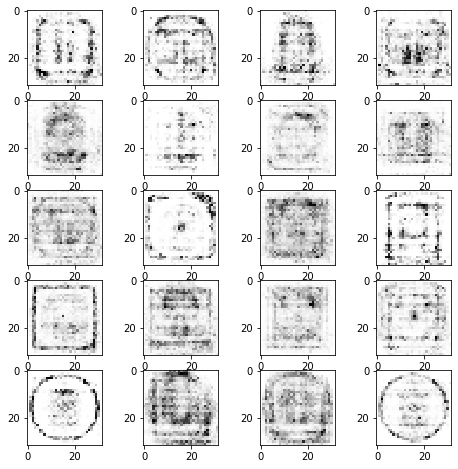


 96%|█████████▋| 482/500 [20:48<00:45,  2.54s/it]

[481/500]: loss_d: 1.126060, loss_g: 1.281367



 97%|█████████▋| 483/500 [20:50<00:41,  2.43s/it]

[482/500]: loss_d: 1.126215, loss_g: 1.281277



 97%|█████████▋| 484/500 [20:52<00:37,  2.35s/it]

[483/500]: loss_d: 1.126450, loss_g: 1.281201



 97%|█████████▋| 485/500 [20:54<00:34,  2.29s/it]

[484/500]: loss_d: 1.126378, loss_g: 1.281247



 97%|█████████▋| 486/500 [20:56<00:31,  2.25s/it]

[485/500]: loss_d: 1.126522, loss_g: 1.280848



 97%|█████████▋| 487/500 [20:58<00:28,  2.23s/it]

[486/500]: loss_d: 1.126502, loss_g: 1.280620



 98%|█████████▊| 488/500 [21:01<00:26,  2.21s/it]

[487/500]: loss_d: 1.126654, loss_g: 1.280321



 98%|█████████▊| 489/500 [21:03<00:24,  2.19s/it]

[488/500]: loss_d: 1.126776, loss_g: 1.279949



 98%|█████████▊| 490/500 [21:05<00:21,  2.19s/it]

[489/500]: loss_d: 1.126828, loss_g: 1.279514



 98%|█████████▊| 491/500 [21:07<00:19,  2.18s/it]

[490/500]: loss_d: 1.127000, loss_g: 1.279021



 98%|█████████▊| 492/500 [21:09<00:17,  2.17s/it]

[491/500]: loss_d: 1.127183, loss_g: 1.278585



 99%|█████████▊| 493/500 [21:11<00:15,  2.16s/it]

[492/500]: loss_d: 1.127258, loss_g: 1.278562



 99%|█████████▉| 494/500 [21:14<00:12,  2.16s/it]

[493/500]: loss_d: 1.127377, loss_g: 1.278289



 99%|█████████▉| 495/500 [21:16<00:10,  2.16s/it]

[494/500]: loss_d: 1.127463, loss_g: 1.278282



 99%|█████████▉| 496/500 [21:18<00:08,  2.16s/it]

[495/500]: loss_d: 1.127601, loss_g: 1.277942



 99%|█████████▉| 497/500 [21:20<00:06,  2.17s/it]

[496/500]: loss_d: 1.127626, loss_g: 1.277919



100%|█████████▉| 498/500 [21:22<00:04,  2.16s/it]

[497/500]: loss_d: 1.127741, loss_g: 1.277691



100%|█████████▉| 499/500 [21:24<00:02,  2.15s/it]

[498/500]: loss_d: 1.127832, loss_g: 1.277228



100%|██████████| 500/500 [21:26<00:00,  2.57s/it]

[499/500]: loss_d: 1.127871, loss_g: 1.277105


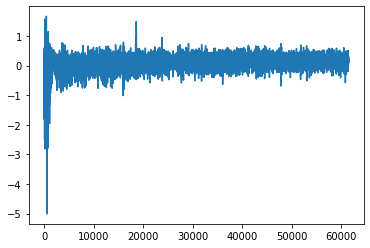

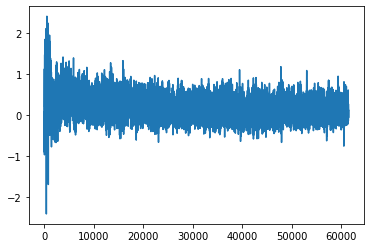

In [22]:
from tqdm import tqdm
D_losses, G_losses = [], []
z_dim = 200
G = Generator(200, 1024).to(device)
D = Discriminator(1024).to(device)

lr = 0.0002
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)
criterion = nn.BCELoss()

for epoch in tqdm(range(num_epochs)):
    for batch_idx, x in enumerate(loader):
        G_losses.append(G_train(x))
        D_losses.append(D_train(x))
    print('[%d/%d]: loss_d: %.6f, loss_g: %.6f' % (
        (epoch), num_epochs, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
    if epoch % 20 == 0:
        images = generate_images(21)
        visualize_images(images, function=lambda x: x.cpu().detach().numpy(), cmap='gray')

plt.plot(np.log(D_losses))
plt.show()
plt.plot(np.log(G_losses))
plt.show()




In [23]:
# build network


In [79]:

# optimizer


In [80]:
from tqdm import tqdm
























  0%|          | 0/500 [00:00<?, ?it/s]



















  0%|          | 1/500 [00:04<33:33,  4.03s/it]

[1/500]: loss_d: 4.024536, loss_g: 23.373568






















  0%|          | 2/500 [00:08<33:52,  4.08s/it]

[2/500]: loss_d: 2.493145, loss_g: 25.051252






















  1%|          | 3/500 [00:12<34:10,  4.13s/it]

[3/500]: loss_d: 1.979170, loss_g: 25.616333






















  1%|          | 4/500 [00:16<34:14,  4.14s/it]

[4/500]: loss_d: 1.722182, loss_g: 25.892729


KeyboardInterrupt: 

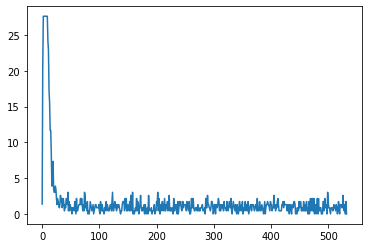

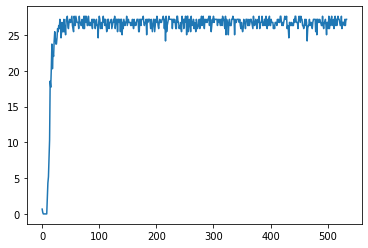

In [13]:
from torchsummary import summary

In [14]:
summary(D, (1, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 2048]       2,099,200
            Linear-2              [-1, 1, 1024]       2,098,176
            Linear-3               [-1, 1, 512]         524,800
            Linear-4                 [-1, 1, 1]             513
Total params: 4,722,689
Trainable params: 4,722,689
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 18.02
Estimated Total Size (MB): 18.05
----------------------------------------------------------------


In [17]:
summary(G, (1, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         102,912
            Linear-2              [-1, 1, 1024]         525,312
            Linear-3              [-1, 1, 2048]       2,099,200
            Linear-4              [-1, 1, 1024]       2,098,176
Total params: 4,825,600
Trainable params: 4,825,600
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 18.41
Estimated Total Size (MB): 18.44
----------------------------------------------------------------
